<a href="https://colab.research.google.com/github/hung1012/DL_Basics/blob/main/TrafficSign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.__version__

'2.5.0'

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
cd /content/gdrive/MyDrive/DL_ANgoc

/content/gdrive/MyDrive/DL_ANgoc


In [5]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
!pip install wget


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9673 sha256=ce51b5b7a22d2e102c27ce65e42312c82ae7d00fc29051f5b8331bf961e1c675
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import wget

In [ ]:
wget.download(link)

'traffic-signs-data (1).zip'

In [9]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip -d $data

replace ./test.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./train.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace ./valid.p? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


In [10]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [11]:
import pickle

In [12]:
with open(train_link, mode ="rb") as f:
  train = pickle.load(f)

In [13]:
with open(valid_link, mode ="rb") as f:
  valid = pickle.load(f)

In [14]:
with open(test_link, mode ="rb") as f:
  test = pickle.load(f)

In [15]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [16]:
trainX = train['features']
trainY = train['labels']

In [17]:
trainX[0].shape

(32, 32, 3)

In [18]:
import matplotlib.pyplot as plt


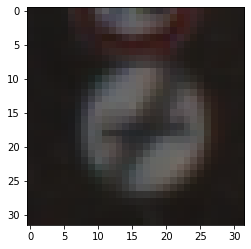

In [19]:
plt.imshow(trainX[0]);

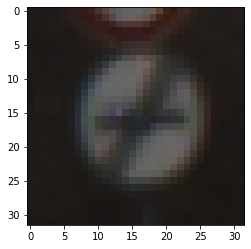

In [20]:
plt.imshow(trainX[5])

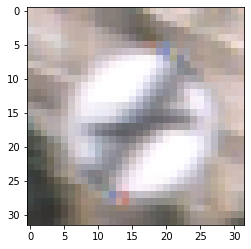

In [21]:
plt.imshow(trainX[50])

In [22]:
trainY[50]

41

In [23]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}



In [24]:
classNames[trainY[50]]

'End of no passing'

In [25]:
from sklearn.utils import shuffle

In [26]:
trainX, trainY = shuffle(trainX, trainY)

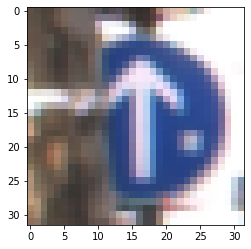

In [27]:
plt.imshow(trainX[0])

In [28]:
classNames[trainY[0]]

'Ahead only'

In [29]:
validX = valid['features']
validY = valid['labels']

In [30]:
testX = test['features']
testY = test['labels']

In [31]:
trainX = trainX.astype("float") / 255.0
validX = validX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [32]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()


In [33]:
trainY = lb.fit_transform(trainY)

In [34]:
validY = lb.fit_transform(validY)


In [35]:
valid["labels"][0]
validY[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [37]:
model = Sequential()

In [38]:
width = 32
height = 32
classes = 43

In [39]:
shape = (width,height,3)

In [40]:
model.add(Conv2D(32, (3,3), padding ="same", input_shape=shape))

In [41]:
model.add(Activation("relu"))

In [42]:
model.add(BatchNormalization())

In [43]:
model.add(Conv2D(32, (3,3), padding ="same"))

In [44]:
model.add(Activation("relu"))

In [45]:
model.add(BatchNormalization())

In [46]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [47]:
model.add(Conv2D(64, (3,3), padding ="same"))

In [48]:
model.add(Activation("relu"))

In [49]:
model.add(BatchNormalization())

In [50]:
model.add(Conv2D(64, (3,3), padding ="same"))

In [51]:
model.add(Activation("relu"))

In [52]:
model.add(BatchNormalization())

In [53]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [54]:
model.add(Flatten())

In [55]:
model.add(Dense(512))

In [56]:
model.add(Activation("relu"))

In [57]:
model.add(BatchNormalization())

In [58]:
model.add(Dense(classes))

In [59]:
model.add(Activation("softmax"))

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

In [61]:
aug = ImageDataGenerator(rotation_range=0.18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)

In [62]:
learning_rate = 0.01

In [64]:
epochs = 10
#Epoch
#Steps
#batch
batch_size = 64

In [65]:
opt = SGD(learning_rate=learning_rate, momentum=0.9)

In [67]:
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics =["accuracy"])

In [69]:
print("Start Training")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(validX, validY), steps_per_epoch= trainX.shape[0]//batch_size, epochs=epochs)

Start Training
Epoch 1/10
  3/543 [..............................] - ETA: 21s - loss: 0.0299 - accuracy: 1.0000

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


543/543 [==============================] - 21s 38ms/step - loss: 0.0464 - accuracy: 0.9860 - val_loss: 0.6627 - val_accuracy: 0.8472
Epoch 2/10
543/543 [==============================] - 20s 36ms/step - loss: 0.0411 - accuracy: 0.9873 - val_loss: 0.5337 - val_accuracy: 0.8694
Epoch 3/10
543/543 [==============================] - 21s 40ms/step - loss: 0.0433 - accuracy: 0.9865 - val_loss: 0.5263 - val_accuracy: 0.8748
Epoch 4/10
543/543 [==============================] - 20s 37ms/step - loss: 0.0384 - accuracy: 0.9877 - val_loss: 0.5648 - val_accuracy: 0.8732
Epoch 5/10
543/543 [==============================] - 21s 38ms/step - loss: 0.0319 - accuracy: 0.9905 - val_loss: 0.5985 - val_accuracy: 0.8832
Epoch 6/10
543/543 [==============================] - 20s 38ms/step - loss: 0.0280 - accuracy: 0.9918 - val_loss: 0.6076 - val_accuracy: 0.8764
Epoch 7/10
543/543 [==============================] - 21s 38ms/step - loss: 0.0258 - accuracy: 0.9918 - val_loss: 0.5674 - val_accuracy: 0.8887
Epo

In [71]:
model.save("ngocnet.h5")

In [73]:
saved_model = tf.keras.models.load_model("ngocnet.h5")

In [91]:
result = saved_model.predict(testX[200:201])

In [88]:
result

array([[5.39747416e-05, 9.99864101e-01, 1.14035367e-06, 9.38504883e-08,
        4.42431599e-07, 7.47239028e-07, 2.94885893e-08, 1.17907518e-06,
        6.25791046e-08, 2.43985568e-07, 3.02384140e-09, 1.02444995e-08,
        5.73122350e-08, 9.31172472e-09, 3.40105487e-07, 3.86599766e-08,
        1.13726157e-08, 1.45310164e-08, 4.25254107e-08, 2.30730848e-08,
        1.66385519e-08, 2.62704489e-08, 9.00377106e-10, 4.43603154e-09,
        9.68328891e-07, 7.12786573e-07, 8.38756087e-09, 2.03173428e-07,
        7.27665611e-05, 1.82674285e-08, 5.79164059e-08, 3.52288865e-10,
        4.13817336e-09, 7.22756823e-08, 1.03331729e-06, 1.12997061e-08,
        7.69649887e-07, 1.36363866e-07, 1.28535991e-08, 9.37672908e-08,
        3.81119179e-07, 6.10780617e-08, 2.88025728e-08]], dtype=float32)

In [77]:
import numpy as np

In [93]:
final = np.argmax(result)

In [94]:
final = classNames[final]

In [95]:
final

'No entry'

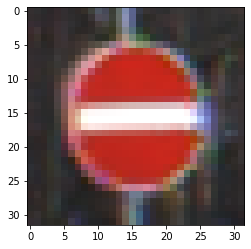

In [96]:
plt.imshow(test["features"][200])